In [2]:
import re
#basic simple regular expression "re"

format_pat= re.compile(
    r"(?P<host>[\d\.]+)\s"
    r"(?P<identity>\S*)\s"
    r"(?P<user>\S*)\s"
    r"\[(?P<time>.*?)\]\s"
    r'"(?P<request>.*?)"\s'
    r"(?P<status>\d+)\s"
    r"(?P<bytes>\S*)\s"
    r'"(?P<referer>.*?)"\s'
    r'"(?P<user_agent>.*?)"\s*'
)


In [3]:
logPath = "D:/DataScience/DataScience-Python3/access_log.txt"

In [4]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            request = access['request']
            fields = request.split()
            if (len(fields) == 3):
                URL = fields[1]
                if URL in URLCounts:
                    URLCounts[URL] = URLCounts[URL] + 1
                else:
                    URLCounts[URL] = 1

results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/xmlrpc.php: 68494
/wp-login.php: 1923
/: 440
/blog/: 138
/robots.txt: 123
/sitemap_index.xml: 118
/post-sitemap.xml: 118
/page-sitemap.xml: 117
/category-sitemap.xml: 117
/orlando-headlines/: 95
/san-jose-headlines/: 85
http://51.254.206.142/httptest.php: 81
/comics-2/: 76
/travel/: 74
/entertainment/: 72
/business/: 70
/national/: 70
/national-headlines/: 70
/world/: 70
/weather/: 70


In [5]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            request = access['request']
            fields = request.split()
            if (len(fields) == 3):
                (action, URL, protocol) = fields
                if (action == 'GET'):
                    if URL in URLCounts:
                        URLCounts[URL] = URLCounts[URL] + 1
                    else:
                        URLCounts[URL] = 1

results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 434
/blog/: 138
/robots.txt: 123
/sitemap_index.xml: 118
/post-sitemap.xml: 118
/page-sitemap.xml: 117
/category-sitemap.xml: 117
/orlando-headlines/: 95
/san-jose-headlines/: 85
http://51.254.206.142/httptest.php: 81
/comics-2/: 76
/travel/: 74
/entertainment/: 72
/business/: 70
/national/: 70
/national-headlines/: 70
/world/: 70
/weather/: 70
/about/: 69
/defense-sticking-head-sand/: 69


In [6]:
UserAgents = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            if agent in UserAgents:
                UserAgents[agent] = UserAgents[agent] + 1
            else:
                UserAgents[agent] = 1

results = sorted(UserAgents, key=lambda i: int(UserAgents[i]), reverse=True)

for result in results:
    print(result + ": " + str(UserAgents[result]))

Mozilla/4.0 (compatible: MSIE 7.0; Windows NT 6.0): 68484
-: 4035
Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.0): 1724
W3 Total Cache/0.9.4.1: 468
Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html): 278
Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html): 248
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.86 Safari/537.36: 158
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0: 144
Mozilla/5.0 (iPad; CPU OS 8_4 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12H143 Safari/600.1.4: 120
Mozilla/5.0 (Linux; Android 5.1.1; SM-G900T Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.76 Mobile Safari/537.36: 47
Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm): 43
Mozilla/5.0 (compatible; MJ12bot/v1.4.5; http://www.majestic12.co.uk/bot.php?+): 41
Opera/9.80 (Windows NT 6.0) Presto/2.12.388 Version/12.1

In [7]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            if (not('bot' in agent or 'spider' in agent or 
                    'Bot' in agent or 'Spider' in agent or
                    'W3 Total Cache' in agent or agent =='-')):
                request = access['request']
                fields = request.split()
                if (len(fields) == 3):
                    (action, URL, protocol) = fields
                    if (action == 'GET'):
                        if URL in URLCounts:
                            URLCounts[URL] = URLCounts[URL] + 1
                        else:
                            URLCounts[URL] = 1

results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 77
/orlando-headlines/: 36
/?page_id=34248: 28
/wp-content/cache/minify/000000/M9AvyUjVzUstLy7PLErVz8lMKkosqtTPKtYvTi7KLCgpBgA.js: 27
/wp-content/cache/minify/000000/M9bPKixNLarUy00szs8D0Zl5AA.js: 27
/wp-content/cache/minify/000000/lY7dDoIwDIVfiG0KxkfxfnbdKO4HuxICTy-it8Zw15PzfSftzPCckJem-x4qUWArqBPl5mygZLEgyhdOaoxToGyGaiALiOfUnIz0qDLOdSZGE-nOlpc3kopDzrSyavVVt_veb5qSDVhjsQ6dHh_B_eE_z2pYIGJ7iBWKeEio_eT9UQe4xHhDll27mGRryVu_pRc.js: 27
/wp-content/cache/minify/000000/fY45DoAwDAQ_FMvkRQgFA5ZyWLajiN9zNHR0O83MRkyt-pIctqYFJPedKyYzfHg2PzOFiENAzaD07AxcpKmTolORvDjZt8KEfhBUGjZYCf8Fb0fvA1TXCw.css: 25
/?author=1: 21
/wp-content/cache/minify/000000/hcrRCYAwDAXAhXyEjiQ1YKAh4SVSx3cE7_uG7ASr4M9qg3kGWyk1adklK84LHtRj_My6Y0Pfqcz-AA.js: 20
/wp-content/uploads/2014/11/nhn1.png: 19
/wp-includes/js/wp-emoji-release.min.js?ver=4.3.1: 17
/wp-content/cache/minify/000000/BcGBCQAgCATAiUSaKYSERPk3avzuht4SkBJnt4tHJdqgnPBqKldesTcN1R8.js: 17
/wp-login.php: 16
/comics-2/: 12
/world/: 12
/favicon.ico: 10
/wp-content/up

In [8]:
URLCounts = {}

with open(logPath, "r") as f:
    for line in (l.rstrip() for l in f):
        match= format_pat.match(line)
        if match:
            access = match.groupdict()
            agent = access['user_agent']
            if (not('bot' in agent or 'spider' in agent or 
                    'Bot' in agent or 'Spider' in agent or
                    'W3 Total Cache' in agent or agent =='-')):
                request = access['request']
                fields = request.split()
                if (len(fields) == 3):
                    (action, URL, protocol) = fields
                    if (URL.endswith("/")):
                        if (action == 'GET'):
                            if URL in URLCounts:
                                URLCounts[URL] = URLCounts[URL] + 1
                            else:
                                URLCounts[URL] = 1

results = sorted(URLCounts, key=lambda i: int(URLCounts[i]), reverse=True)

for result in results[:20]:
    print(result + ": " + str(URLCounts[result]))

/: 77
/orlando-headlines/: 36
/comics-2/: 12
/world/: 12
/weather/: 4
/australia/: 4
/about/: 4
/national-headlines/: 3
/feed/: 2
/sample-page/feed/: 2
/science/: 2
/technology/: 2
/entertainment/: 1
/san-jose-headlines/: 1
/business/: 1
/travel/feed/: 1


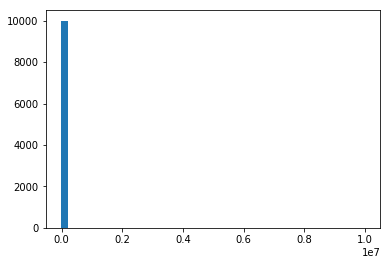

In [31]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [10000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 40)
plt.show()

In [22]:
incomes.mean()

27731.13263737077

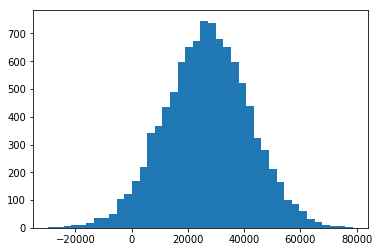

In [27]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 4 * s < e < u + 4 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 40)
plt.show()

In [29]:
np.mean(filtered)

26733.90575063451

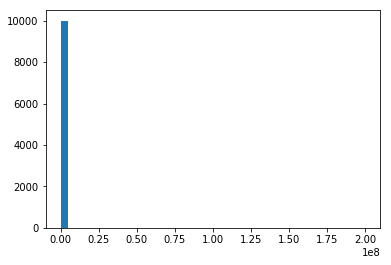

In [34]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(35000, 15000, 10000)
incomes = np.append(incomes, [10000000])
incomes = np.append(incomes, [200000000])#adding 2nd outlier

import matplotlib.pyplot as plt
plt.hist(incomes, 40)
plt.show()

In [35]:
incomes.mean()

55861.57339130926

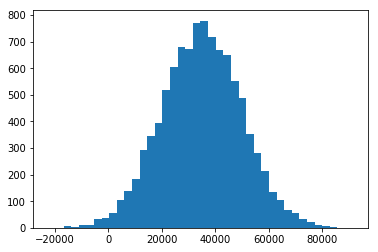

In [36]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 4 * s < e < u + 4 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 40)
plt.show()

In [37]:
np.mean(filtered)

34872.745705987516